In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.inspection import permutation_importance

warnings.filterwarnings("ignore")

# Load data
csv_features = "./Dataset/acsincome_ca_features.csv"
csv_labels = "./Dataset/acsincome_ca_labels.csv"
features = pd.read_csv(csv_features)
labels = pd.read_csv(csv_labels)

# Separating features and labels, shuffling
X_all = features
Y_all = labels
X_all,Y_all = shuffle(X_all,Y_all, random_state=0)

# Only use first N samples to limit training time
sample = 0.1
num_samples = int(len(X_all)*sample)
X,Y = X_all[:num_samples], Y_all[:num_samples]

# Separate train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=0, train_size=0.8)

# 1. Corrélations entre les features et le label réel

In [5]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_train)
dfY = pd.DataFrame(Y_train)
df_train = pd.concat([dfX, dfY], axis=1)
df_train

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
47409,38.0,1.0,22.0,1.0,1320.0,120.0,0.0,46.0,1.0,1.0,True
93837,39.0,1.0,21.0,1.0,940.0,6.0,0.0,50.0,1.0,1.0,False
21296,40.0,1.0,1.0,1.0,8990.0,303.0,0.0,40.0,1.0,1.0,False
123187,51.0,1.0,1.0,1.0,8990.0,313.0,6.0,40.0,1.0,8.0,True
10662,34.0,3.0,19.0,1.0,800.0,6.0,0.0,40.0,1.0,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...
124299,57.0,1.0,10.0,5.0,6441.0,303.0,6.0,40.0,1.0,8.0,False
113335,36.0,1.0,9.0,5.0,4220.0,303.0,10.0,82.0,1.0,8.0,False
153900,55.0,3.0,22.0,1.0,230.0,109.0,0.0,40.0,2.0,1.0,True
133465,21.0,1.0,19.0,5.0,4600.0,6.0,0.0,8.0,2.0,9.0,False


In [7]:
corr = df_train.corr()

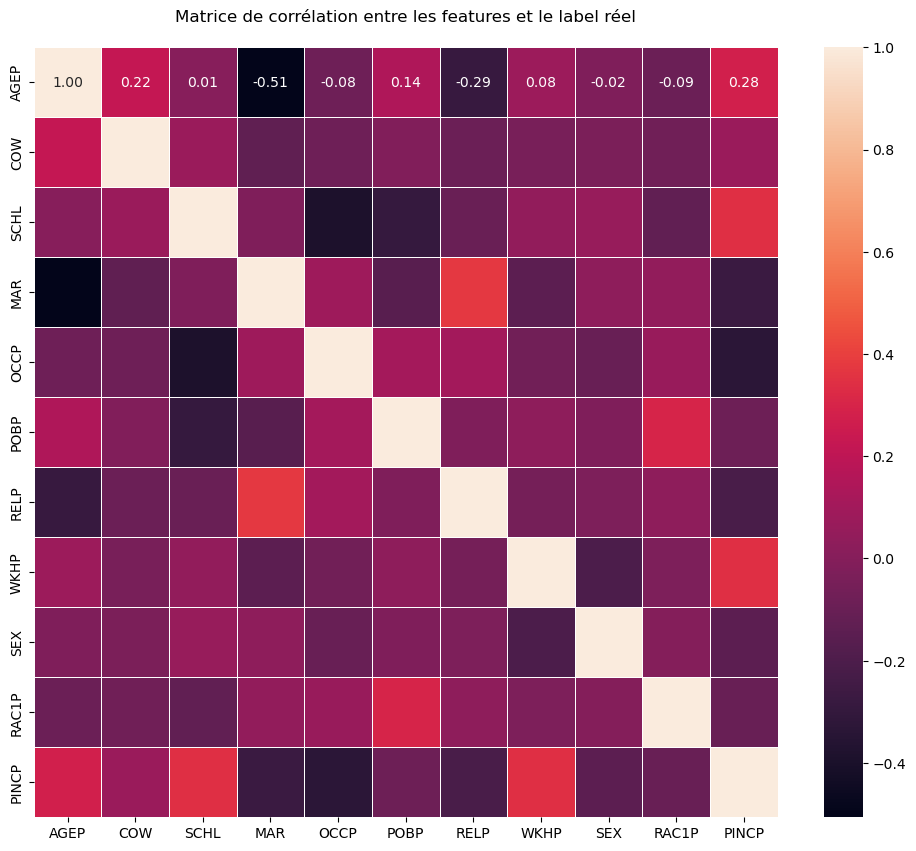

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features et le label réel prédit par SVM\n")
plt.show()

# 2. Corrélations entre chacune des features et le label prédit

In [118]:
# Scaler for data standardization
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

## SVM

In [127]:
# Meilleur modèle SVM : 
SVM_model = SVC(gamma=0.09)
SVM_model.fit(X_train, Y_train)

SVC(gamma=0.09)

In [128]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_test, columns=X.columns)
dfY = pd.DataFrame(SVM_model.predict(X_test), columns=['PINCP'])
df_testSVM = pd.concat([dfX, dfY], axis=1)
df_testSVM

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,-0.512211,0.971929,0.123692,-0.896171,-0.970190,-0.650653,-0.557846,0.145059,-0.949170,-0.703867,True
1,0.816083,0.444384,0.384119,-0.896171,0.925092,1.681834,-0.557846,0.145059,-0.949170,-0.703867,False
2,-1.176359,-0.610708,-0.136734,1.282471,0.212188,-0.480575,2.217087,-1.403447,1.053553,-0.703867,False
3,1.347401,-0.610708,0.644545,-0.896171,-1.004966,-0.723543,-0.326602,-1.403447,-0.949170,-0.703867,False
4,-1.043529,-0.610708,0.904971,1.282471,-1.051334,0.928635,2.217087,-0.629194,-0.949170,0.996711,False
...,...,...,...,...,...,...,...,...,...,...,...
3909,-1.242773,0.444384,0.644545,1.282471,-0.207441,-0.723543,2.217087,0.145059,1.053553,1.676943,False
3910,-1.375603,-0.610708,-1.699291,1.282471,1.927795,1.228295,1.754598,0.145059,-0.949170,0.996711,False
3911,0.882498,0.971929,1.165397,-0.351510,-1.372045,1.228295,-0.557846,-0.629194,1.053553,0.996711,True
3912,-1.309188,-0.083162,0.384119,1.282471,2.196342,-0.650653,-0.557846,-1.403447,-0.949170,1.336827,False


In [129]:
corrSVM = df_testSVM.corr()

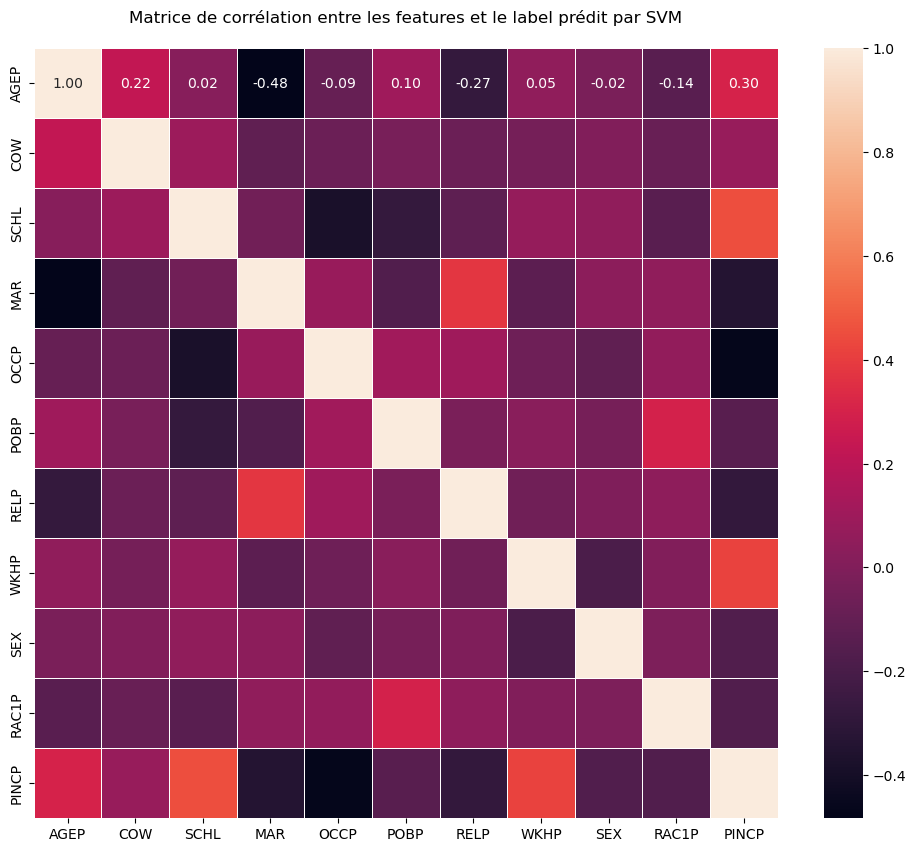

In [130]:

plt.figure(figsize=(12,10))
sns.heatmap(corrSVM, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features et le label prédit par SVM\n")
plt.show()

## Random Forest

In [131]:
# Meilleur modèle RF : 
RF_model = RandomForestClassifier(n_estimators=200, criterion='log_loss', max_depth=10, min_samples_split=30,
                                  min_samples_leaf=6, max_features='sqrt')
RF_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=6,
                       min_samples_split=30, n_estimators=200)

In [132]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_test, columns=X.columns)
dfY = pd.DataFrame(SVM_model.predict(X_test), columns=['PINCP'])
df_testRF = pd.concat([dfX, dfY], axis=1)
df_testRF

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,-0.512211,0.971929,0.123692,-0.896171,-0.970190,-0.650653,-0.557846,0.145059,-0.949170,-0.703867,True
1,0.816083,0.444384,0.384119,-0.896171,0.925092,1.681834,-0.557846,0.145059,-0.949170,-0.703867,False
2,-1.176359,-0.610708,-0.136734,1.282471,0.212188,-0.480575,2.217087,-1.403447,1.053553,-0.703867,False
3,1.347401,-0.610708,0.644545,-0.896171,-1.004966,-0.723543,-0.326602,-1.403447,-0.949170,-0.703867,False
4,-1.043529,-0.610708,0.904971,1.282471,-1.051334,0.928635,2.217087,-0.629194,-0.949170,0.996711,False
...,...,...,...,...,...,...,...,...,...,...,...
3909,-1.242773,0.444384,0.644545,1.282471,-0.207441,-0.723543,2.217087,0.145059,1.053553,1.676943,False
3910,-1.375603,-0.610708,-1.699291,1.282471,1.927795,1.228295,1.754598,0.145059,-0.949170,0.996711,False
3911,0.882498,0.971929,1.165397,-0.351510,-1.372045,1.228295,-0.557846,-0.629194,1.053553,0.996711,True
3912,-1.309188,-0.083162,0.384119,1.282471,2.196342,-0.650653,-0.557846,-1.403447,-0.949170,1.336827,False


In [133]:
corrRF = df_testRF.corr()

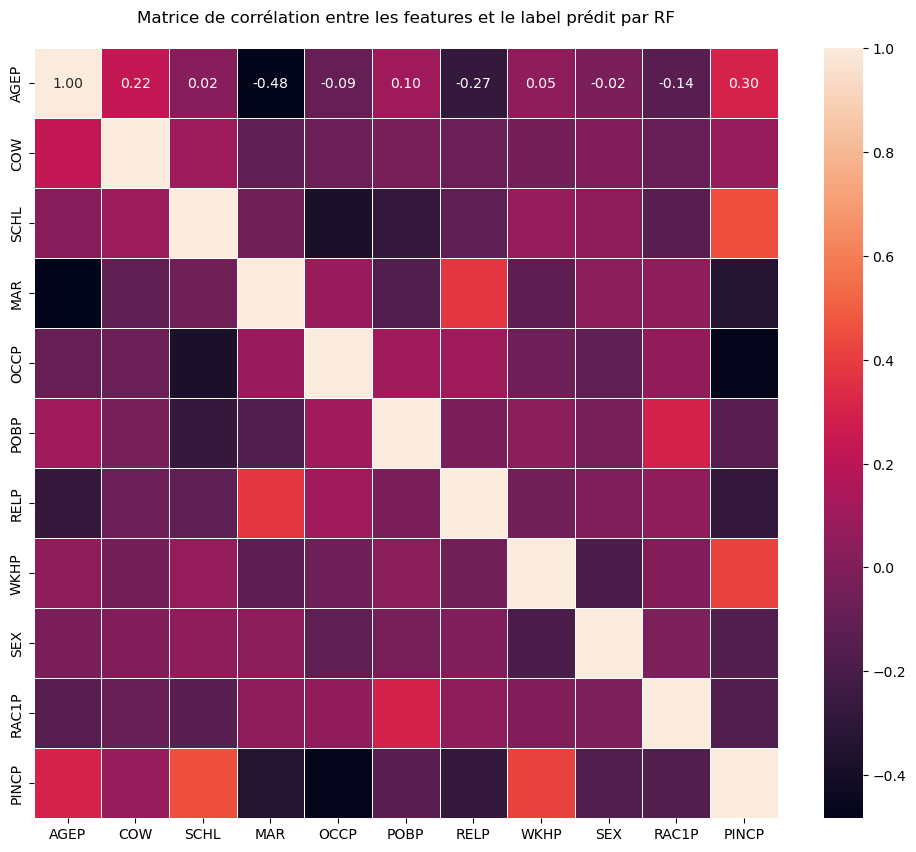

In [134]:
plt.figure(figsize=(12,10))
sns.heatmap(corrRF, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features et le label prédit par RF\n")
plt.show()

## AvaBoost

In [135]:
# Meilleur modèle AB : 
AB_model = AdaBoostClassifier(n_estimators=600, learning_rate=1.0, algorithm='SAMME.R')
AB_model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=600)

In [136]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_test, columns=X.columns)
dfY = pd.DataFrame(SVM_model.predict(X_test), columns=['PINCP'])
df_testAB = pd.concat([dfX, dfY], axis=1)
df_testAB

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,-0.512211,0.971929,0.123692,-0.896171,-0.970190,-0.650653,-0.557846,0.145059,-0.949170,-0.703867,True
1,0.816083,0.444384,0.384119,-0.896171,0.925092,1.681834,-0.557846,0.145059,-0.949170,-0.703867,False
2,-1.176359,-0.610708,-0.136734,1.282471,0.212188,-0.480575,2.217087,-1.403447,1.053553,-0.703867,False
3,1.347401,-0.610708,0.644545,-0.896171,-1.004966,-0.723543,-0.326602,-1.403447,-0.949170,-0.703867,False
4,-1.043529,-0.610708,0.904971,1.282471,-1.051334,0.928635,2.217087,-0.629194,-0.949170,0.996711,False
...,...,...,...,...,...,...,...,...,...,...,...
3909,-1.242773,0.444384,0.644545,1.282471,-0.207441,-0.723543,2.217087,0.145059,1.053553,1.676943,False
3910,-1.375603,-0.610708,-1.699291,1.282471,1.927795,1.228295,1.754598,0.145059,-0.949170,0.996711,False
3911,0.882498,0.971929,1.165397,-0.351510,-1.372045,1.228295,-0.557846,-0.629194,1.053553,0.996711,True
3912,-1.309188,-0.083162,0.384119,1.282471,2.196342,-0.650653,-0.557846,-1.403447,-0.949170,1.336827,False


In [137]:
corr = df_testAB.corr()

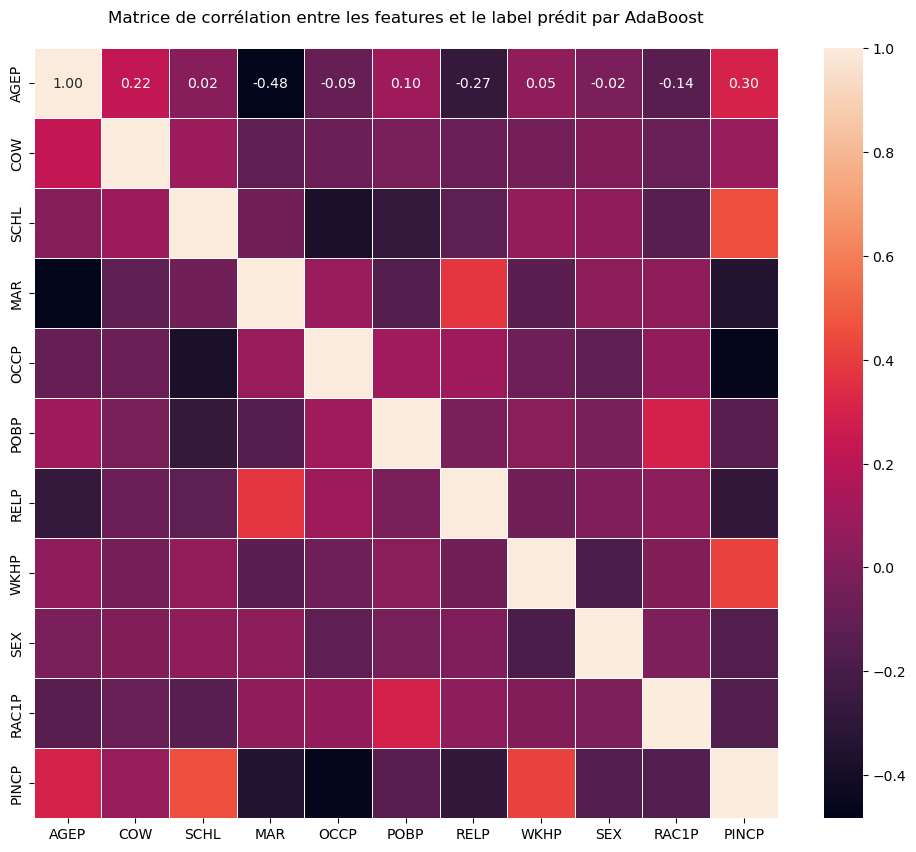

In [138]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features et le label prédit par AdaBoost\n")
plt.show()

## Gradient Boosting

In [139]:
# Meilleur modèle GB : 
GB_model = GradientBoostingClassifier(loss='exponential', n_estimators=500, criterion='friedman_mse', min_samples_split=10,
                                  min_samples_leaf=6, max_depth=6)
GB_model.fit(X_train, Y_train)

GradientBoostingClassifier(loss='exponential', max_depth=6, min_samples_leaf=6,
                           min_samples_split=10, n_estimators=500)

In [140]:
# Construire un pandas Dataframe pour utiliser la fonction de corrélation
dfX = pd.DataFrame(X_test, columns=X.columns)
dfY = pd.DataFrame(SVM_model.predict(X_test), columns=['PINCP'])
df_testGB = pd.concat([dfX, dfY], axis=1)
df_testGB

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P,PINCP
0,-0.512211,0.971929,0.123692,-0.896171,-0.970190,-0.650653,-0.557846,0.145059,-0.949170,-0.703867,True
1,0.816083,0.444384,0.384119,-0.896171,0.925092,1.681834,-0.557846,0.145059,-0.949170,-0.703867,False
2,-1.176359,-0.610708,-0.136734,1.282471,0.212188,-0.480575,2.217087,-1.403447,1.053553,-0.703867,False
3,1.347401,-0.610708,0.644545,-0.896171,-1.004966,-0.723543,-0.326602,-1.403447,-0.949170,-0.703867,False
4,-1.043529,-0.610708,0.904971,1.282471,-1.051334,0.928635,2.217087,-0.629194,-0.949170,0.996711,False
...,...,...,...,...,...,...,...,...,...,...,...
3909,-1.242773,0.444384,0.644545,1.282471,-0.207441,-0.723543,2.217087,0.145059,1.053553,1.676943,False
3910,-1.375603,-0.610708,-1.699291,1.282471,1.927795,1.228295,1.754598,0.145059,-0.949170,0.996711,False
3911,0.882498,0.971929,1.165397,-0.351510,-1.372045,1.228295,-0.557846,-0.629194,1.053553,0.996711,True
3912,-1.309188,-0.083162,0.384119,1.282471,2.196342,-0.650653,-0.557846,-1.403447,-0.949170,1.336827,False


In [141]:
corr = df_testGB.corr()

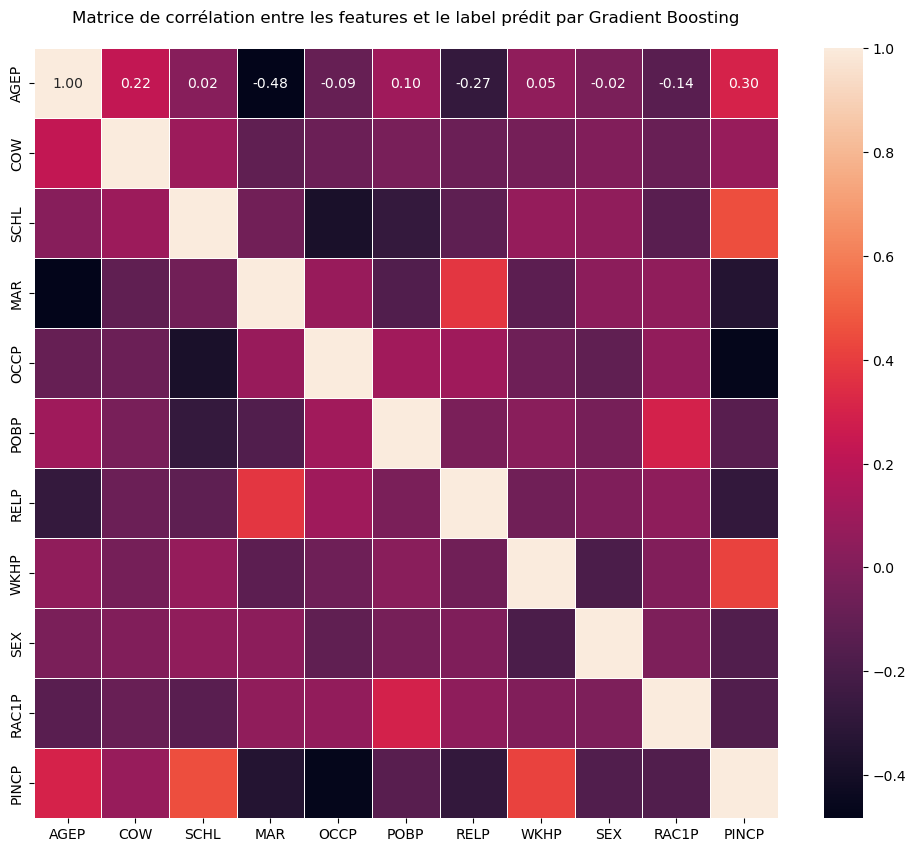

In [142]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation entre les features et le label prédit par Gradient Boosting\n")
plt.show()

# 3. Evaluation de l'importance de chaque feature

## SVM

In [91]:
# Meilleur modèle SVM : 
SVM_model = SVC(gamma=0.09)
SVM_model.fit(X_train, Y_train)

SVC(gamma=0.09)

In [92]:
resultSVM = permutation_importance(SVM_model, X_test, Y_test, n_repeats=10, n_jobs=2)

In [93]:
sorted_idx = resultSVM.importances_mean.argsort()
sorted_idx = sorted_idx[::-1]
sorted_idx

array([4, 2, 0, 9, 7, 5, 3, 6, 1, 8])

In [94]:
importance_score = resultSVM.importances_mean
importance_score

array([0.01509964, 0.00265713, 0.01594277, 0.00638733, 0.03063362,
       0.00919775, 0.00500766, 0.01188043, 0.00081758, 0.01354113])

In [95]:
importance_std = resultSVM.importances_std
importance_std

array([0.00257389, 0.00162072, 0.00228291, 0.00086264, 0.00296295,
       0.00289734, 0.00209816, 0.00153402, 0.00052111, 0.00219189])

In [96]:
# Print the feature importance scores for each feature
print("Feature Importance Scores:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importance_score[i]*100:.3f} %")

Feature Importance Scores:
OCCP: 3.063 %
SCHL: 1.594 %
AGEP: 1.510 %
RAC1P: 1.354 %
WKHP: 1.188 %
POBP: 0.920 %
MAR: 0.639 %
RELP: 0.501 %
COW: 0.266 %
SEX: 0.082 %


Text(0.5, 1.0, 'Feature Importance with Standard Deviation for SVM \n')

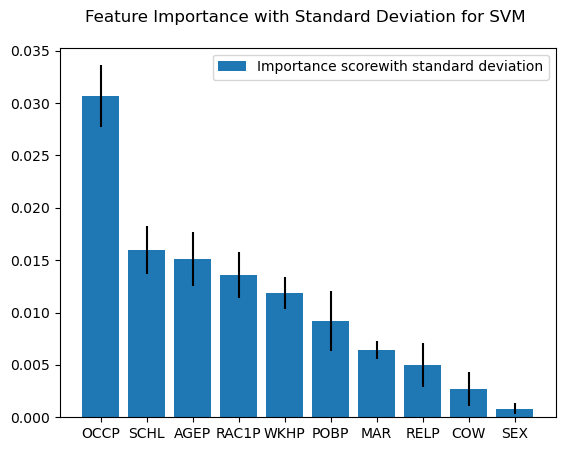

In [97]:
plt.bar(X.columns[sorted_idx], importance_score[sorted_idx], yerr =importance_std[sorted_idx], label="Importance scorewith standard deviation")
plt.legend()
plt.title("Feature Importance with Standard Deviation for SVM \n")

## Random Forest

In [98]:
# Meilleur modèle RF : 
RF_model = RandomForestClassifier(n_estimators=200, criterion='log_loss', max_depth=10, min_samples_split=30,
                                  min_samples_leaf=6, max_features='sqrt')
RF_model.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=10, min_samples_leaf=6,
                       min_samples_split=30, n_estimators=200)

In [99]:
resultRF = permutation_importance(RF_model, X_test, Y_test, n_repeats=10, n_jobs=2)

In [100]:
sorted_idx = resultRF.importances_mean.argsort()
sorted_idx = sorted_idx[::-1]
sorted_idx

array([7, 4, 0, 2, 6, 8, 5, 1, 3, 9])

In [101]:
importance_score = resultRF.importances_mean
importance_score

array([0.03640777, 0.00268268, 0.03392948, 0.00260603, 0.0444047 ,
       0.00390904, 0.02294328, 0.06734798, 0.01474195, 0.00033214])

In [102]:
importance_std = resultRF.importances_std
importance_std

array([0.00386505, 0.00057415, 0.0028377 , 0.00137492, 0.00255442,
       0.0025678 , 0.00326552, 0.00237265, 0.0028952 , 0.00086302])

In [103]:
# Print the feature importance scores for each feature
print("Feature Importance Scores:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importance_score[i]*100:.3f} %")

Feature Importance Scores:
WKHP: 6.735 %
OCCP: 4.440 %
AGEP: 3.641 %
SCHL: 3.393 %
RELP: 2.294 %
SEX: 1.474 %
POBP: 0.391 %
COW: 0.268 %
MAR: 0.261 %
RAC1P: 0.033 %


Text(0.5, 1.0, 'Feature Importance with Standard Deviation for Random Forest \n')

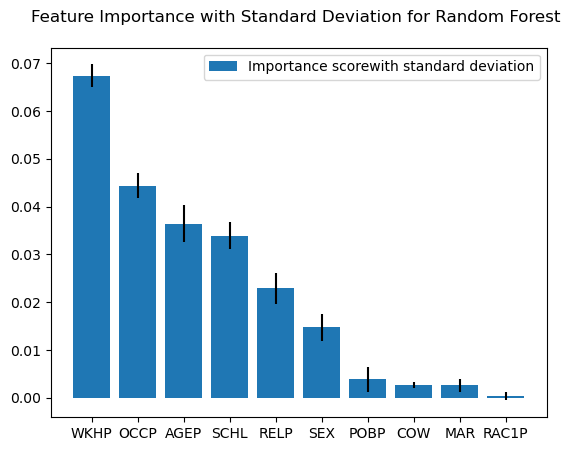

In [104]:
plt.bar(X.columns[sorted_idx], importance_score[sorted_idx], yerr =importance_std[sorted_idx], label="Importance scorewith standard deviation")
plt.legend()
plt.title("Feature Importance with Standard Deviation for Random Forest \n")

## AdaBoost

In [105]:
# Meilleur modèle AB : 
AB_model = AdaBoostClassifier(n_estimators=600, learning_rate=1.0, algorithm='SAMME.R')
AB_model.fit(X_train, Y_train)

AdaBoostClassifier(n_estimators=600)

In [106]:
resultAB = permutation_importance(AB_model, X_test, Y_test, n_repeats=10, n_jobs=2)

In [107]:
sorted_idx = resultAB.importances_mean.argsort()
sorted_idx = sorted_idx[::-1]
sorted_idx

array([4, 7, 0, 2, 6, 8, 5, 1, 3, 9])

In [108]:
importance_score = resultAB.importances_mean
importance_score

array([0.04473684, 0.00429228, 0.03817067, 0.00219724, 0.07008176,
       0.00556975, 0.01566173, 0.06096065, 0.00958099, 0.00022994])

In [109]:
importance_std = resultAB.importances_std
importance_std

array([0.00459668, 0.00148889, 0.00625327, 0.00172604, 0.00357334,
       0.00310358, 0.00332151, 0.00401409, 0.00160473, 0.00120624])

In [80]:
# Print the feature importance scores for each feature
print("Feature Importance Scores:")
for i in sorted_idx:print(f"{X.columns[i]}: {importance_score[i]*100:.3f} %")

Feature Importance Scores:
OCCP: 6.594 %
WKHP: 5.754 %
AGEP: 4.476 %
SCHL: 3.539 %
RELP: 1.735 %
SEX: 1.058 %
COW: 0.557 %
POBP: 0.296 %
MAR: 0.263 %
RAC1P: -0.031 %


Text(0.5, 1.0, 'Feature Importance with Standard Deviation for AdaBoost \n')

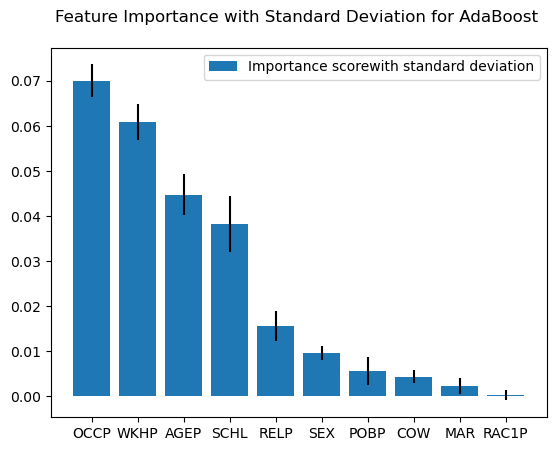

In [110]:
plt.bar(X.columns[sorted_idx], importance_score[sorted_idx], yerr =importance_std[sorted_idx], label="Importance scorewith standard deviation")
plt.legend()
plt.title("Feature Importance with Standard Deviation for AdaBoost \n")

## Gradient Boosting

In [111]:
# Meilleur modèle GB : 
GB_model = GradientBoostingClassifier(loss='exponential', n_estimators=500, criterion='friedman_mse', min_samples_split=10,
                                  min_samples_leaf=6, max_depth=6)
GB_model.fit(X_train, Y_train)

GradientBoostingClassifier(loss='exponential', max_depth=6, min_samples_leaf=6,
                           min_samples_split=10, n_estimators=500)

In [112]:
result = permutation_importance(GB_model, X_test, Y_test, n_repeats=10, n_jobs=2)

In [113]:
sorted_idx = result.importances_mean.argsort()
sorted_idx = sorted_idx[::-1]
sorted_idx

array([4, 7, 0, 2, 6, 1, 5, 8, 3, 9])

In [114]:
importance_score = result.importances_mean
importance_score

array([4.93357179e-02, 8.94225856e-03, 3.41594277e-02, 2.81042412e-04,
       7.13592233e-02, 3.55135411e-03, 1.55339806e-02, 5.55952989e-02,
       3.34695963e-03, 7.66479305e-05])

In [115]:
importance_std = result.importances_std
importance_std

array([0.00412517, 0.0025215 , 0.00303177, 0.00189634, 0.00510865,
       0.00265381, 0.00360019, 0.0050173 , 0.00124878, 0.0018984 ])

In [116]:
# Print the feature importance scores for each feature
print("Feature Importance Scores:")
for i in sorted_idx:
    print(f"{X.columns[i]}: {importance_score[i]*100:.3f} %")

Feature Importance Scores:
OCCP: 7.136 %
WKHP: 5.560 %
AGEP: 4.934 %
SCHL: 3.416 %
RELP: 1.553 %
COW: 0.894 %
POBP: 0.355 %
SEX: 0.335 %
MAR: 0.028 %
RAC1P: 0.008 %


Text(0.5, 1.0, 'Feature Importance with Standard Deviation for GradientBoosting \n')

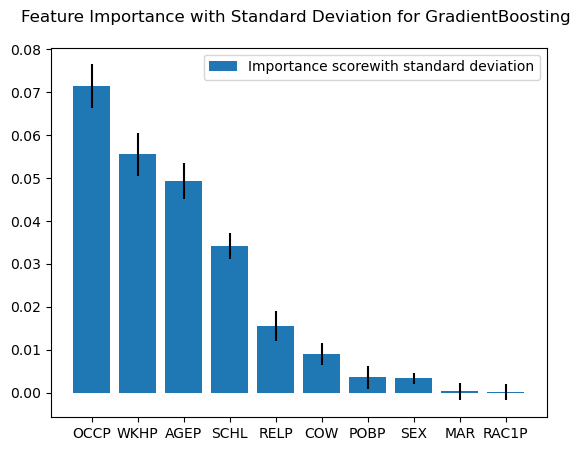

In [117]:
plt.bar(X.columns[sorted_idx], importance_score[sorted_idx], yerr =importance_std[sorted_idx], label="Importance scorewith standard deviation")
plt.legend()
plt.title("Feature Importance with Standard Deviation for GradientBoosting \n")